In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import random

In [51]:
df_itr = pd.read_csv('datasets/Clean_Pandemic_Taxi_Data.csv', chunksize=10000, index_col=0)
df_itr

In [52]:
for df in df_itr:
    break
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Bronx_PU,Brooklyn_PU,Manhattan_PU,Queens_PU,Staten_Island_PU,Bronx_DO,Brooklyn_DO,Manhattan_DO,Queens_DO,Staten_Island_DO
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
1,2.0,2020-01-01 00:24:22,2020-01-01 00:25:54,1.0,0.56,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
2,2.0,2020-01-01 00:46:46,2020-01-01 00:49:17,1.0,0.62,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,2020-01-01 00:17:53,2020-01-01 00:22:47,1.0,0.80,1.0,Y,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
4,2.0,2020-01-01 00:49:45,2020-01-01 00:54:12,1.0,0.86,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10029,2.0,2020-01-19 18:43:25,2020-01-19 18:46:55,2.0,0.67,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
10030,2.0,2020-01-19 18:43:55,2020-01-19 18:50:05,1.0,1.20,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
10031,2.0,2020-01-19 19:28:28,2020-01-19 19:31:28,2.0,0.43,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
10032,1.0,2020-01-19 19:20:10,2020-01-19 19:23:58,2.0,1.20,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0


In [53]:
x_name = 'trip_distance'
y_name = 'total_amount'

In [54]:
x_trip_distance = df[x_name]
x_trip_distance

0        1.20
1        0.56
2        0.62
3        0.80
4        0.86
         ... 
10029    0.67
10030    1.20
10031    0.43
10032    1.20
10033    1.22
Name: trip_distance, Length: 10000, dtype: float64

In [55]:
y_total_amount = df[y_name]
y_total_amount

0        11.27
1         9.00
2         9.30
3        11.15
4        11.16
         ...  
10029     9.75
10030    11.76
10031     7.30
10032    11.80
10033     9.80
Name: total_amount, Length: 10000, dtype: float64

Text(0, 0.5, 'total_amount')

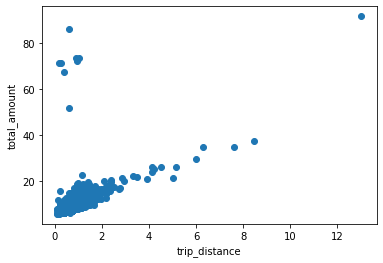

In [56]:
plt.scatter(x_trip_distance, y_total_amount)
plt.xlabel(x_name)
plt.ylabel(y_name)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(x_trip_distance), y_total_amount)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
residual = y_test - y_pred
residual

6638    0.444875
3075    0.556071
6300   -1.147271
511    -0.589177
6607    0.953450
          ...   
1942   -0.499647
5054   -0.876075
4077   -0.647271
8317    1.588447
6959   -1.647271
Name: total_amount, Length: 2500, dtype: float64

ValueError: x and y must be the same size

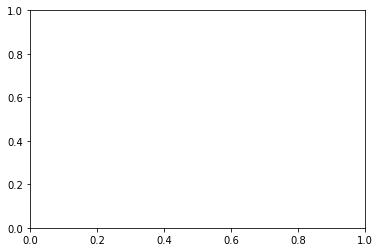

In [49]:
# A plot of the Linear Regression residuals
plt.scatter(X_test, residual, color='red')
plt.xlabel(x_name)
plt.ylabel('Linear Regression residuals')
plt.show()

In [18]:
np.mean(residual)

-0.03318310280378295

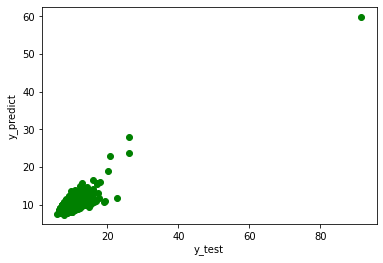

In [19]:
# A scatter plot of y_test vs. y_pred
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()
# The plot shows that it is close to forming a straight diagonal line.
# It means the values are close to each other.

In [39]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)
ridge_residual = y_test - ridge_y_pred
ridge_residual

6275   -0.140647
4701   -0.160217
1733   -0.151472
4759   -0.160217
4538    0.310650
          ...   
6436   -0.167531
8315    0.764864
7880   -0.132092
1096   -0.180133
6953   -0.136410
Name: total_amount, Length: 2000, dtype: float64

ValueError: x and y must be the same size

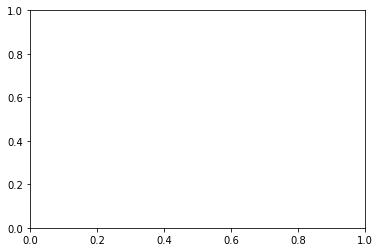

In [48]:
len(X_test) == len(ridge_residual)
plt.scatter(X_test, ridge_residual, color='red')

ValueError: x and y must be the same size

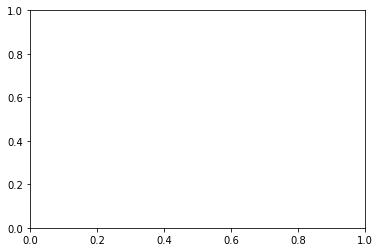

In [47]:
# A plot of the Ridge Regression residuals
plt.scatter(x=X_test, y=ridge_residual, color='red')
plt.xlabel('index')
plt.ylabel('Ridge Regression residuals')
plt.show()

In [36]:
np.mean(ridge_residual)

-0.03321194667365364

The residual data I have shows that the features with strong correlation to total_amount act as good measures to predicting total_amount. The residuals seem to be close to 0 in each case. 